In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as SKPCA

In [7]:
df = pd.read_csv('data/tripadvisor_european_restaurants.csv')

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

df_num = df[numeric_cols].dropna()
X = df_num.values

#Padronizar os dados
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

C:\Users\Thiago\AppData\Local\Temp\ipykernel_4848\2492124126.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/tripadvisor_european_restaurants.csv')


In [ ]:
#PCA NumPy
cov = np.cov(X_std.T)                   

eig_vals, eig_vecs = np.linalg.eig(cov)

idx = np.argsort(eig_vals)[::-1]
eig_vals_ord = eig_vals[idx]
eig_vecs_ord = eig_vecs[:, idx]

k = 2
components = eig_vecs_ord[:, :k]

proj_numpy = X_std.dot(components)

explained_var_ratio_numpy = eig_vals_ord / eig_vals_ord.sum()
print("Variância obtida", explained_var_ratio_numpy[:k])


Variância obtida [0.33014265 0.24617617]


In [9]:
#PCA scikit-learn
skpca = SKPCA(n_components=2)
proj_sklearn = skpca.fit_transform(X_std)
print("Variancaia obtida:", skpca.explained_variance_ratio_)

Variancaia obtida: [0.33014265 0.24617617]


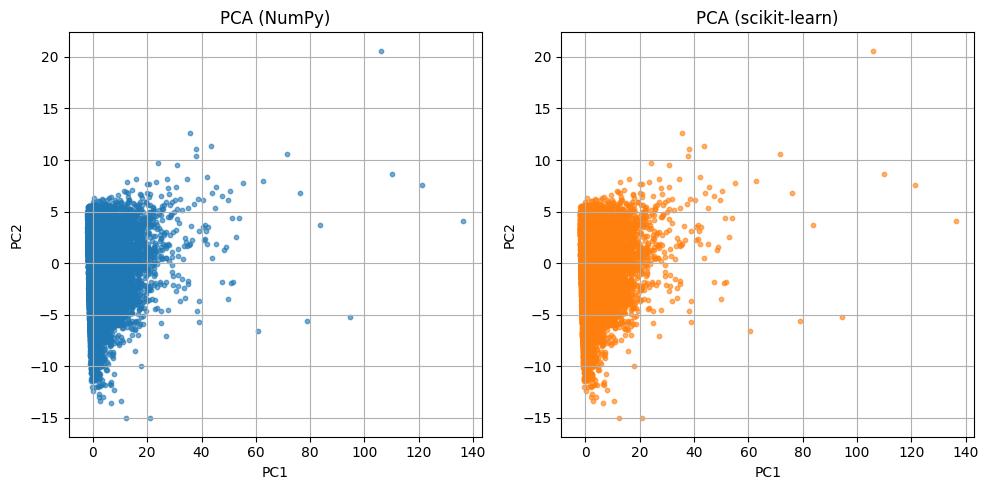

In [11]:
#plot PCA
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(proj_numpy[:,0], proj_numpy[:,1], s=10, alpha=0.6)
plt.title("PCA (NumPy)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)

plt.subplot(1,2,2)
plt.scatter(proj_sklearn[:,0], proj_sklearn[:,1], s=10, alpha=0.6, c='tab:orange')
plt.title("PCA (scikit-learn)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)

plt.tight_layout()
plt.show()